# Ch 3. 監督式學習：分類
## 3-3. 評估分類器的效能
 - [訓練邏輯斯迴歸模型](#sec1)  
 - [加入正規化](#sec2)
***

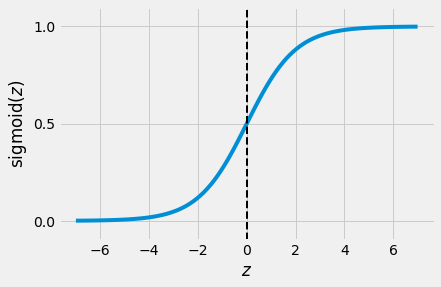

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def sigmoid(z):
    return 1./(1.+np.exp(-z))

z = np.linspace(-7, 7, 100)
plt.plot(z, sigmoid(z))
plt.axvline(0., color='black', ls='--', lw=2)
plt.xlabel('$z$')
plt.ylabel('sigmoid($z$)')
plt.ylim(-0.1, 1.1)
plt.yticks([0., 0.5, 1.]);

<a id='sec1'></a>
## 訓練邏輯斯迴歸模型

In [2]:
import pandas as pd

df = pd.read_csv('Pokemon_894_13.csv')
df['hasType2'] = df['Type2'].notnull().astype(int)
print('雙屬性的數量：', df['hasType2'].sum())
print('單屬性的數量：', df.shape[0]-df['hasType2'].sum())
df.tail(3)

雙屬性的數量： 473
單屬性的數量： 421


,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary,hasType2
891,805,壘磊石,Rock,Steel,61,131,211,53,101,13,7,False,1
892,806,砰頭小丑,Fire,Ghost,53,127,53,151,79,107,7,False,1
893,807,捷拉奧拉,Electric,NaN,88,112,75,102,80,143,7,False,0


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = df.loc[:, 'HP':'Speed'], df['hasType2']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('|雙屬性|/|訓練集| =', y_train.sum()/y_train.size)
print('|雙屬性|/|測試集| =', y_test.sum()/y_test.size)

logit = LogisticRegression()
logit.fit(X_train, y_train)
logit.score(X_test, y_test)

|雙屬性|/|訓練集| = 0.5134328358208955
|雙屬性|/|測試集| = 0.5758928571428571


0.6026785714285714

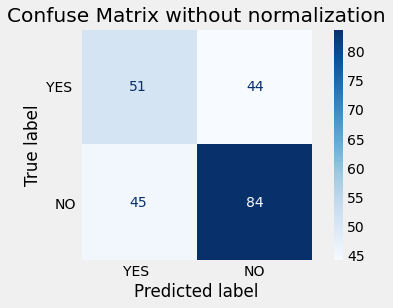

In [4]:
from sklearn.metrics import plot_confusion_matrix

# 類別標籤
class_names = ['YES ', 'NO']
disp = plot_confusion_matrix(logit, X_test, y_test, 
                             display_labels=class_names, 
                             cmap=plt.cm.Blues)
disp.ax_.set_title('Confuse Matrix without normalization')
plt.grid()

In [5]:
from sklearn.model_selection import cross_val_score

# 進行 k 次交叉驗證(default k=5)
cvs = cross_val_score(logit, X_test, y_test, scoring='accuracy')
print(cvs, '\n', cvs.mean())

[0.51111111 0.71111111 0.55555556 0.57777778 0.54545455] 
 0.5802020202020202


In [6]:
cvs = cross_val_score(logit, X_test, y_test, scoring='f1')
print(cvs, '\n', cvs.mean())

[0.62068966 0.77966102 0.61538462 0.6779661  0.61538462] 
 0.6618172009171425


scikit-learn 提供的F1分數有以下幾種：
- f1: 二元分類使用
- f1_macro: 計算每個分類F1分數的平均，每個類別的權重相等
- f1_weighted: 計算每個分類F1分數的平均，類別權重依該類別大小而定
- f1_micro: 不區分類別，直接使用整體的精確度與召回率按公式計算

In [7]:
from sklearn.metrics import classification_report

# 產生分類報告
y_pred = logit.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.54      0.53        95
           1       0.66      0.65      0.65       129

    accuracy                           0.60       224
   macro avg       0.59      0.59      0.59       224
weighted avg       0.60      0.60      0.60       224



In [8]:
# 依預測機率調整輸出的類別
prob = logit.predict_proba(X_test)

# 設定機率門檻值，傾向預測為類別1
y_pred2 = [0 if p[0] > 0.6 else 1 for p in prob]
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.58      0.20      0.30        95
           1       0.60      0.89      0.72       129

    accuracy                           0.60       224
   macro avg       0.59      0.55      0.51       224
weighted avg       0.59      0.60      0.54       224



<a id='sec2'></a>
## 訓練邏輯斯迴歸模型

In [9]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# 先做標準化
scalar = StandardScaler().fit(X_train)
X_train_std = scalar.transform(X_train)
X_test_std = scalar.transform(X_test)

# 預設從 1e-4 ~ 1e4 間產生 10 個 C 值進行交叉驗證
clf = LogisticRegressionCV(Cs=10, cv=5, penalty='l2')
clf.fit(X_train_std, y_train)
print('最佳 C 值：', clf.C_)
y_pred = clf.predict(X_test_std)
print(classification_report(y_test, y_pred))

最佳 C 值： [0.35938137]
              precision    recall  f1-score   support

           0       0.54      0.56      0.55        95
           1       0.67      0.65      0.66       129

    accuracy                           0.61       224
   macro avg       0.60      0.60      0.60       224
weighted avg       0.61      0.61      0.61       224

